<a href="https://colab.research.google.com/github/MrvZzZzZ/Lab3_AI_for_study/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentencepiece tqdm matplotlib -q

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import re

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

def get_poem_links(author_page_url):
    resp = requests.get(author_page_url, headers=headers)
    resp.encoding = 'cp1251'
    soup = BeautifulSoup(resp.text, 'html.parser')
    links = []
    fonts = soup.find_all('font')
    for font in fonts:
        tag_a = font.find_all('a')
        for a in tag_a:
            href = a['href']
            full_url = author_page_url + href
            title = a.get_text(strip=True)
            links.append((title, full_url))
    print(f"Найдено {len(links)} стихотворений")
    return links

def extract_poem_text(poem_url):
    try:
        resp = requests.get(poem_url, headers=headers)
        resp.encoding = 'cp1251'
        soup = BeautifulSoup(resp.text, 'html.parser')
        fonts = soup.find_all('font')
        if not fonts:
            return None

        lines = []
        for font in fonts[1:-1]:
          for elem in font.contents:
              if getattr(elem, 'name', None) == 'br':
                  continue
              if isinstance(elem, str):
                  text = elem.strip()
              else:
                  text = elem.get_text().strip()
              if text:
                  lines.append(text)

        return lines

    except Exception as e:
        print(f"Ошибка при скачивании {poem_url}: {e}")
        return None

def download_author_corpus(index_url):
    poems = []
    links = get_poem_links(index_url)
    for i, (title, url) in enumerate(links[:100], 1):
        print(f"[{i}/{len(links[:100])}] {title}")
        text = extract_poem_text(url)
        if text:
            poems.append("\n".join(text))
        else:
            print("Не удалось извлечь текст")
        time.sleep(0.8)
    return poems

In [ ]:
lermontov = download_author_corpus(
    "https://stihi-rus.ru/1/Lermontov/"
)
pushkin = download_author_corpus(
    "https://stihi-rus.ru/Pushkin/stihi/"
)
tyutchev = download_author_corpus(
    "https://stihi-rus.ru/1/Tyutchev/"
)
data = [
    ("Lermontov.txt", lermontov),
    ("Pushkin.txt", pushkin),
    ("Tyutchev.txt", tyutchev)]

for (path, text) in data:
  corpus = "\n\n".join(text)
  with open(path, "w", encoding="utf-8") as f:
      f.write(corpus)


Найдено 278 стихотворений
[1/100] Стихи о любви
[2/100] Лермонтов биография
Не удалось извлечь текст
[3/100] А. О. Смирновой
[4/100] Ангел
[5/100] Баллада (В избушке позднею порою...)
[6/100] Баллада (Над морем красавица-дева...)
[7/100] Бартеневой
[8/100] Башилову
[9/100] Благодарность
[10/100] Благодарю!
[11/100] Блистая, пробегают облака...
[12/100] Бой
[13/100] Бородино
[14/100] eng
[15/100] Бухариной
[16/100] В альбом
[17/100] Валерик
[18/100] Венеция
[19/100] Весна
[20/100] Ветка Палестины
[21/100] Вечер после дождя
[22/100] Взгляни на этот лик...
[23/100] Видение
[24/100] Воздушный корабль
[25/100] Воля
[26/100] Выхожу один я на дорогу...
[27/100] Глупой красавице
[28/100] Гляжу на будущность с боязнью...
[29/100] Графине Ростопчиной
[30/100] Гусар
[31/100] Дары Терека
[32/100] Демон
[33/100] Договор
[34/100] Додо
[35/100] Дума
[36/100] Есть речи - значенье...
[37/100] Желанье (Отворите мне темницу...)
[38/100] Заблуждение Купидона
[39/100] Забудь опять свои надежды...
[40/100] 

In [ ]:
import gdown

def download(file_id, output):
  url = f"https://drive.google.com/uc?id={file_id}"
  gdown.download(url, output+".txt", quiet=False)

data = [
    ("15Ma1wdiPQIH3tH1jOTXL9fi2sN8YIsK-", "Pushkin"),
    ("1_XSJ4Wu1qRHljBXaV6YHIgwEmAZXJl8L", "Lermontov"),
    ("1QphNg0hrGFvcArkgxhnI2hTQW4h3XZbG", "Tyutchev")
]

text=""
authors = []
for (id, author) in data:
  download(id, author)
  authors.append(author)
  with open(f'{author+".txt"}', 'r', errors='ignore') as f:
    text += f.read()


Downloading...
From: https://drive.google.com/uc?id=15Ma1wdiPQIH3tH1jOTXL9fi2sN8YIsK-
To: /content/Pushkin.txt
100%|██████████| 132k/132k [00:00<00:00, 44.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_XSJ4Wu1qRHljBXaV6YHIgwEmAZXJl8L
To: /content/Lermontov.txt
100%|██████████| 267k/267k [00:00<00:00, 57.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QphNg0hrGFvcArkgxhnI2hTQW4h3XZbG
To: /content/Tyutchev.txt
100%|██████████| 78.8k/78.8k [00:00<00:00, 20.3MB/s]


In [ ]:
print(text)

19 октября 1825
Роняет лес багряный свой убор,
Сребрит мороз увянувшее поле,
Проглянет день как будто поневоле
И скроется за край окружных гор.
Пылай, камин, в моей пустынной келье;
А ты, вино, осенней стужи друг,
Пролей мне в грудь отрадное похмелье,
Минутное забвенье горьких мук.
Печален я: со мною друга нет,
С кем долгую запил бы я разлуку,
Кому бы мог пожать от сердца руку
И пожелать веселых много лет.
Я пью один; вотще воображенье
Вокруг меня товарищей зовет;
Знакомое не слышно приближенье,
И милого душа моя не ждет.
Я пью один, и на брегах Невы
Меня друзья сегодня именуют...
Но многие ль и там из вас пируют?
Еще кого не досчитались вы?
Кто изменил пленительной привычке?
Кого от вас увлек холодный свет?
Чей глас умолк на братской перекличке?
Кто не пришел? Кого меж вами нет?
Он не пришел, кудрявый наш певец,
С огнем в очах, с гитарой сладкогласной:
Под миртами Италии прекрасной
Он тихо спит, и дружеский резец
Не начертал над русскою могилой
Слов несколько на языке родном,
Чтоб нек

In [ ]:
import sentencepiece as spm
import os

# Сохраняем корпус во временный файл
with open("/tmp/corpus.txt", "w", encoding="utf-8") as f:
    f.write(text)

# Обучаем BPE-модель (2048 токенов — достаточно для tiny-GPT)
spm.SentencePieceTrainer.train(
    input="/tmp/corpus.txt",
    model_prefix="poetry",
    vocab_size=2048,
    model_type="bpe",
    character_coverage=1.0,
    pad_id=0, unk_id=1, bos_id=2, eos_id=3,
    pad_piece="<pad>", unk_piece="<unk>", bos_piece="<s>", eos_piece="</s>",
    user_defined_symbols=["\n"],  # ← КЛЮЧЕВО: сохраняем \n как отдельный символ!
)

# Загружаем токенизатор
sp = spm.SentencePieceProcessor()
sp.load("poetry.model")

# Проверка
test = "Я вас любил: любовь еще, быть может,\nНо пусть она вас больше не тревожит;"
print("Текст:", test)
print("Токены:", sp.encode(test, out_type=str))
print("IDs:", sp.encode(test, out_type=int))
print("Декод:", sp.decode(sp.encode(test)))

Текст: Я вас любил: любовь еще, быть может,
Но пусть она вас больше не тревожит;
Токены: ['▁Я', '▁вас', '▁любил', ':', '▁любовь', '▁еще', ',', '▁быть', '▁может', ',', '\n', 'Н', 'о', '▁пу', 'сть', '▁она', '▁вас', '▁больше', '▁не', '▁трево', 'жит', ';']
IDs: [147, 470, 1300, 1961, 1002, 914, 1933, 844, 641, 1933, 4, 1949, 1919, 258, 104, 375, 470, 1877, 31, 874, 654, 1951]
Декод: Я вас любил: любовь еще, быть может,
Но пусть она вас больше не тревожит;


In [ ]:
import torch

# Разбиваем на стихотворения (по двойному \n)
poems = [p.strip() for p in text.strip().split("\n\n") if p.strip()]

# Кодируем каждое стихотворение с <s> и </s>
encoded = []
for poem in poems:
    ids = sp.encode(poem, add_bos=True, add_eos=True)
    encoded.extend(ids)

data = torch.tensor(encoded, dtype=torch.long)
vocab_size = sp.get_piece_size()

print(f"Всего токенов: {len(data):,}")
print(f"Размер словаря: {vocab_size}")
print(f"Первые 20 ID: {data[:20].tolist()}")
print(f"Декод первых: '{sp.decode(data[:20].tolist())}'")

Всего токенов: 111,694
Размер словаря: 2048
Первые 20 ID: [2, 797, 2007, 855, 1143, 1940, 213, 797, 2005, 1993, 2011, 4, 1977, 156, 1939, 17, 541, 16, 1921, 1941]
Декод первых: '19 октября 1825
Роняет лес баг'


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Head(nn.Module):
    def __init__(self, head_size, n_embd, block_size, dropout=0.1):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape
        k = self.key(x)
        q = self.query(x)
        v = self.value(x)
        wei = q @ k.transpose(-2, -1) * C**-0.5
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        return wei @ v

class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size, n_embd, block_size, dropout=0.1):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size, n_embd, block_size, dropout) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        return self.dropout(self.proj(out))

class FeedForward(nn.Module):
    def __init__(self, n_embd, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )
    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    def __init__(self, n_embd, n_head, block_size, dropout=0.1):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size, n_embd, block_size, dropout)
        self.ffwd = FeedForward(n_embd, dropout)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class TinyGPT(nn.Module):
    def __init__(self, vocab_size, n_embd=128, n_head=4, n_layer=3, block_size=128, dropout=0.1):
        super().__init__()
        self.block_size = block_size
        self.tok_emb = nn.Embedding(vocab_size, n_embd)
        self.pos_emb = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head, block_size, dropout) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        assert T <= self.block_size, f"Слишком длинная последовательность: {T} > {self.block_size}"
        tok_emb = self.tok_emb(idx)
        pos_emb = self.pos_emb(torch.arange(T, device=idx.device))
        x = self.dropout(tok_emb + pos_emb)
        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.lm_head(x)
        loss = None
        if targets is not None:
            logits = logits.view(-1, logits.size(-1))
            targets = targets.view(-1)
            loss = F.cross_entropy(logits, targets, ignore_index=0)
        return logits, loss

    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -self.block_size:]
            logits, _ = self(idx_cond)
            logits = logits[:, -1, :] / temperature
            if top_k is not None:
                v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
                logits[logits < v[:, [-1]]] = -float('Inf')
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat([idx, idx_next], dim=1)
        return idx

In [ ]:
# Гиперпараметры
block_size = 256
batch_size = 256
max_iters = 3000
eval_interval = 250
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f"Используем устройство: {device}")

# Разделение данных
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split):
    data_split = train_data if split == 'train' else val_data
    ix = torch.randint(len(data_split) - block_size, (batch_size,))
    x = torch.stack([data_split[i:i+block_size] for i in ix])
    y = torch.stack([data_split[i+1:i+1+block_size] for i in ix])
    return x.to(device), y.to(device)

# Инициализация модели
torch.manual_seed(1337)
model = TinyGPT(
    vocab_size=vocab_size,
    n_embd=128,
    n_head=4,
    n_layer=3,
    block_size=block_size,
    dropout=0.1
).to(device)

print(f"Модель: {sum(p.numel() for p in model.parameters())/1e6:.2f}M параметров")

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

@torch.no_grad()
def estimate_loss():
    model.eval()
    out = {}
    for split in ['train', 'val']:
        losses = torch.zeros(10).to(device)
        for k in range(10):
            X, Y = get_batch(split)
            _, loss = model(X, Y)
            losses[k] = loss
        mean_loss = losses.mean().item()
        mean_ppl = torch.exp(torch.tensor(mean_loss)).item()
        out[split] = {'loss': mean_loss, 'ppl': mean_ppl}
    model.train()
    return out

Используем устройство: cuda
Модель: 1.15M параметров


In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0.0, verbose=True):
        """
        :param patience: сколько eval-шагов ждать, пока не улучшится val_ppl
        :param delta: минимальное улучшение (в perplexity), чтобы считать "улучшением"
        :param verbose: печатать сообщения?
        """
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def step(self, val_ppl):
        score = -val_ppl

        if self.best_score is None:
            self.best_score = score
            if self.verbose:
                print(f"EarlyStopping: первый лучший val_ppl = {val_ppl:.2f}")
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping: {self.counter}/{self.patience} без улучшения (лучший val_ppl: {-self.best_score:.2f})")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            if self.verbose:
                print(f"Улучшение val_ppl → {val_ppl:.2f} (лучший)")

Начинаем обучение...
iter    0 | train loss: 7.8073 | val loss: 7.8145 | val ppl: 2476.14
EarlyStopping: первый лучший val_ppl = 2476.14
iter  250 | train loss: 5.3160 | val loss: 5.4379 | val ppl: 229.96
Улучшение val_ppl → 229.96 (лучший)
iter  500 | train loss: 4.5961 | val loss: 5.0475 | val ppl: 155.63
Улучшение val_ppl → 155.63 (лучший)
iter  750 | train loss: 4.1522 | val loss: 4.9140 | val ppl: 136.18
Улучшение val_ppl → 136.18 (лучший)
iter 1000 | train loss: 3.8852 | val loss: 4.9041 | val ppl: 134.84
Улучшение val_ppl → 134.84 (лучший)
iter 1250 | train loss: 3.6815 | val loss: 4.9389 | val ppl: 139.62
EarlyStopping: 1/5 без улучшения (лучший val_ppl: 134.84)
iter 1500 | train loss: 3.4930 | val loss: 5.0205 | val ppl: 151.49
EarlyStopping: 2/5 без улучшения (лучший val_ppl: 134.84)
iter 1750 | train loss: 3.3163 | val loss: 5.0767 | val ppl: 160.25
EarlyStopping: 3/5 без улучшения (лучший val_ppl: 134.84)
iter 2000 | train loss: 3.1249 | val loss: 5.1709 | val ppl: 176.08
E

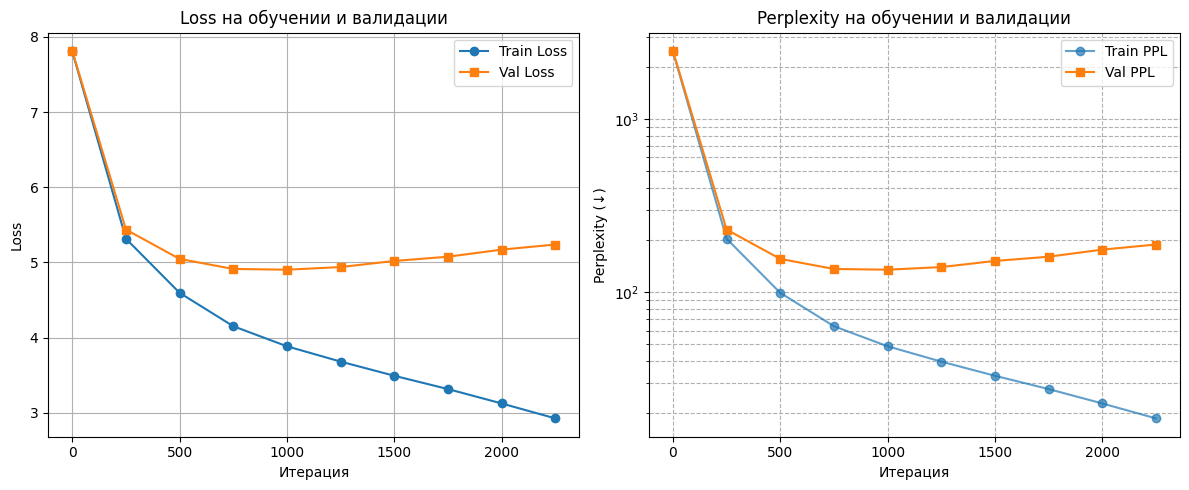


Final val loss: 5.2389
Final val perplexity: 188.45


In [ ]:
import matplotlib.pyplot as plt

train_losses, val_losses = [], []
train_ppls, val_ppls = [], []
eval_iters = []
early_stopping = EarlyStopping(patience=5, delta=0.1, verbose=True)

print("Начинаем обучение...")

for iter in range(max_iters):
    if iter % eval_interval == 0:
        eval_iters.append(iter)
        metrics = estimate_loss()
        train_losses.append(metrics['train']['loss'])
        val_losses.append(metrics['val']['loss'])
        train_ppls.append(metrics['train']['ppl'])
        val_ppls.append(metrics['val']['ppl'])
        print(f"iter {iter:4d} | "
              f"train loss: {metrics['train']['loss']:.4f} | "
              f"val loss: {metrics['val']['loss']:.4f} | "
              f"val ppl: {metrics['val']['ppl']:.2f}")

        early_stopping.step(metrics['val']['ppl'])
        if early_stopping.early_stop:
            print(f"\nОстановка обучения на iter {iter}: val perplexity не улучшается {early_stopping.patience} eval-шагов.")
            break

    xb, yb = get_batch('train')
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


print("Обучение завершено!")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eval_iters, train_losses, label='Train Loss', marker='o')
plt.plot(eval_iters, val_losses, label='Val Loss', marker='s')
plt.xlabel('Итерация')
plt.ylabel('Loss')
plt.title('Loss на обучении и валидации')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(eval_iters, train_ppls, label='Train PPL', marker='o', color='C0', alpha=0.7)
plt.plot(eval_iters, val_ppls, label='Val PPL', marker='s', color='C1')
plt.xlabel('Итерация')
plt.ylabel('Perplexity (↓)')
plt.title('Perplexity на обучении и валидации')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

print(f"\nFinal val loss: {val_losses[-1]:.4f}")
print(f"Final val perplexity: {val_ppls[-1]:.2f}")

In [ ]:
def generate_poem(prompt, max_new_tokens=150, temperature=0.7, top_k=50):
    input_ids = sp.encode(prompt, add_bos=True, out_type=int)
    input_tensor = torch.tensor([input_ids], device=device)
    out = model.generate(input_tensor, max_new_tokens, temperature=temperature, top_k=top_k)
    return sp.decode(out[0].tolist())

prompts = [
    "Я вас любил:",
    "У лукоморья дуб зелёный;",
    "Люблю грозу в начале мая,",
    "Как хорошо ты, о, природа!",
    "Ночь. Улица. Фонарь."
]

print("Сгенерированные стихи:\n" + "="*50)

for i, prompt in enumerate(prompts, 1):
    print(f"\n{i}. Промпт: \"{prompt}\"")
    print("-" * 40)
    poem = generate_poem(prompt)
    print(poem)
    print("="*50)

Сгенерированные стихи:

1. Промпт: "Я вас любил:"
----------------------------------------
Я вас любил: дева
Сквозь судьбы, она
Тыла,
Сплив с перловится с девольчи:
Не слышать на полюда
Где прощай,
Сикто не проклятых высоте проезмолвит
На, для них приперед ада
Ктобожил
Стобкинув,
Ск своих друзей
Изин-подна глядите,
Подят к слабы ты,
И волныю...
Болшебный светло,
Сквозь туманном волнений знаешь,
Сердцу будет гробит;
Смотрите мне,
Пром

2. Промпт: "У лукоморья дуб зелёный;"
----------------------------------------
У лукоморья дуб зелёный;
И в один набожделизолотистых?
И так в лесов,
Кто в вырские конюрыгаясь,
Колникипирывлекит,
Из пламящит он конях спор,
Вок и карни
Сия тем как гор
Веркесы - как бегущенный
Измей шел,
Как будто над царя видит. Они криком,
Вились даль глядите,
Как будто ближе...
Но входит ближе.
Оними, она, с берег,
Исегда вольставало,
Иль как кустаритит

3. Промпт: "Люблю грозу в начале мая,"
----------------------------------------
Люблю грозу в начале мая,
Извонкой овра

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

model_path = "/content/drive/MyDrive/Lab3/tiny_gpt_poetry.pth"
torch.save({
    'model_state_dict': model.state_dict(),
    'vocab_size': vocab_size,
    'block_size': block_size,
}, model_path)

print(f"Модель сохранена: {model_path}")

!cp poetry.model poetry.vocab /content/drive/MyDrive/Lab3/

print("Tokenizer сохранён: poetry.model, poetry.vocab")

Mounted at /content/drive
Модель сохранена: /content/drive/MyDrive/Lab3/tiny_gpt_poetry.pth
Tokenizer сохранён: poetry.model, poetry.vocab


In [ ]:
import sentencepiece as spm

model_path = "/content/drive/MyDrive/Lab3/tiny_gpt_poetry.pth"
spm_model_path = "/content/drive/MyDrive/Lab3/poetry.model"
spm_vocab_path = "/content/drive/MyDrive/Lab3/poetry.vocab"

sp = spm.SentencePieceProcessor()
sp.load(spm_model_path)
print("Токенизатор загружен. Размер словаря:", sp.get_piece_size())

Токенизатор загружен. Размер словаря: 2048
